### 1. Dependencies

In [2]:
# Step 1. Update the PATH env var. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.6/site-packages"

In [1]:
# Step 2. Restart the Kernel.

In [2]:
!python -m pip install 'numpy==1.19.5' 'prompt-toolkit<2.0.0,>=1.0.15' 'jupyter-client>=7.0.0' 'jsonschema>=3.0.1' 'widgetsnbextension==3.0.0'

    100% |████████████████████████████████| 13.4MB 1.5MB/s eta 0:00:01   65% |█████████████████████           | 8.8MB 39.1MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 22.9MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 16.2MB/s ta 0:00:01
    100% |████████████████████████████████| 2.5MB 10.7MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 20.0MB/s ta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: jupyter-core 4.4.0
    Uninstalling jupyter-core-4.4.0:
      Successfully uninstalled jupyter-core-4.4.0
  Found existing installation: jupyter-client 5.2.4
    Uninstalling jupyter-client-5.2.4:
      Successfully uninstalled jupyter-client-5.2.4
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
  Found existing installation: widgetsnbextension 3.1

In [3]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.


In [4]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from unityagents import UnityEnvironment
import numpy as np

### 2. Loading and exploring the environment

In [5]:
# load environnement and get default brain
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
#print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Training and results

In [7]:
from dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0)

In [8]:
def dqn(n_episodes=2000, max_t=100000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """   
    n_episodes (int): maximum number of training episodes
    max_t (int): maximum number of timesteps per episode
    eps_start (float): starting value of epsilon, for epsilon-greedy action selection
    eps_end (float): minimum value of epsilon
    eps_decay (float): multiplicative factor (per episode) for decreasing epsilon"""

    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] 
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = int(agent.act(state, eps))
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]   
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

In [9]:
scores = dqn()

Episode 100	Average Score: 0.84
Episode 200	Average Score: 3.40
Episode 300	Average Score: 6.71
Episode 400	Average Score: 9.94
Episode 500	Average Score: 12.99
Episode 600	Average Score: 13.59
Episode 700	Average Score: 13.82
Episode 774	Average Score: 15.04
Environment solved in 674 episodes!	Average Score: 15.04


In [10]:
env.close()

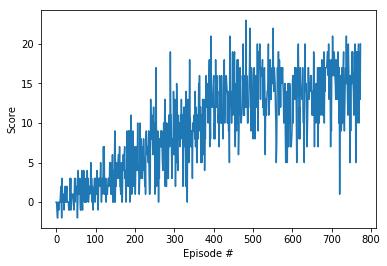

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()